In [2]:
import pandas as pd

# Load the data
data = pd.read_csv(r"C:\Users\Amanda.Aninagyei\Downloads\smartwatch_synthetic_data_with_alerts.csv")

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())



  Age Group        HRV       SpO2  Accelerometer  Gyroscope  Stress Level  \
0  Under 18  58.204822  98.279022      -1.280304   1.440117            96   
1  Under 18  55.072740  98.607897       0.872457  -0.676392             1   
2  Under 18  60.666747  98.186609       0.650201   1.800940            96   
3  Under 18  61.692956  97.553566      -0.099176  -0.040158            32   
4  Under 18  63.821590  98.194090       1.846637  -1.430775            76   

   Heart Alert  
0            0  
1            0  
2            0  
3            0  
4            0  
Age Group        0
HRV              0
SpO2             0
Accelerometer    0
Gyroscope        0
Stress Level     0
Heart Alert      0
dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variables
X = data[['HRV', 'SpO2', 'Accelerometer', 'Gyroscope']]
y_stress = data['Stress Level']
y_heart_alert = data['Heart Alert']

# Split the data into training and testing sets
X_train, X_test, y_train_stress, y_test_stress = train_test_split(X, y_stress, test_size=0.2, random_state=42)
_, _, y_train_heart, y_test_heart = train_test_split(X, y_heart_alert, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Train a linear regression model for stress level prediction
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train_stress)

# Train a logistic regression model for heart-related issue prediction
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train_heart)


LogisticRegression()

In [5]:
# Predict stress levels
y_pred_stress = linear_reg_model.predict(X_test)
stress_mse = mean_squared_error(y_test_stress, y_pred_stress)
print(f'Stress Level Prediction MSE: {stress_mse}')

# Predict heart-related issues
y_pred_heart = logistic_reg_model.predict(X_test)
heart_accuracy = accuracy_score(y_test_heart, y_pred_heart)
print(f'Heart Alert Prediction Accuracy: {heart_accuracy}')


Stress Level Prediction MSE: 958.2596114639553
Heart Alert Prediction Accuracy: 1.0


In [6]:
def predict_stress_and_heart_alert(sensor_data):
    """
    Predict stress level and heart alert based on incoming sensor data.

    Parameters:
    sensor_data (dict): Dictionary containing sensor values:
                        {'HRV': value, 'SpO2': value, 'Accelerometer': value, 'Gyroscope': value}

    Returns:
    dict: Dictionary containing predicted stress level and heart alert:
          {'Stress Level': predicted_stress, 'Heart Alert': predicted_heart_alert}
    """
    # Convert sensor data to DataFrame
    input_data = pd.DataFrame([sensor_data])

    # Predict stress level
    predicted_stress = linear_reg_model.predict(input_data)[0]

    # Predict heart alert
    predicted_heart_alert = logistic_reg_model.predict(input_data)[0]

    return {'Stress Level': predicted_stress, 'Heart Alert': predicted_heart_alert}

# Example usage with real-time data
real_time_data = {'HRV': 45, 'SpO2': 97, 'Accelerometer': 0.5, 'Gyroscope': 0.1}
prediction = predict_stress_and_heart_alert(real_time_data)
print(prediction)


{'Stress Level': 52.86064384459573, 'Heart Alert': 0}


In [9]:
sns.pairplot(data, hue='Heart Alert')plt.show()


SyntaxError: invalid syntax (163073051.py, line 1)

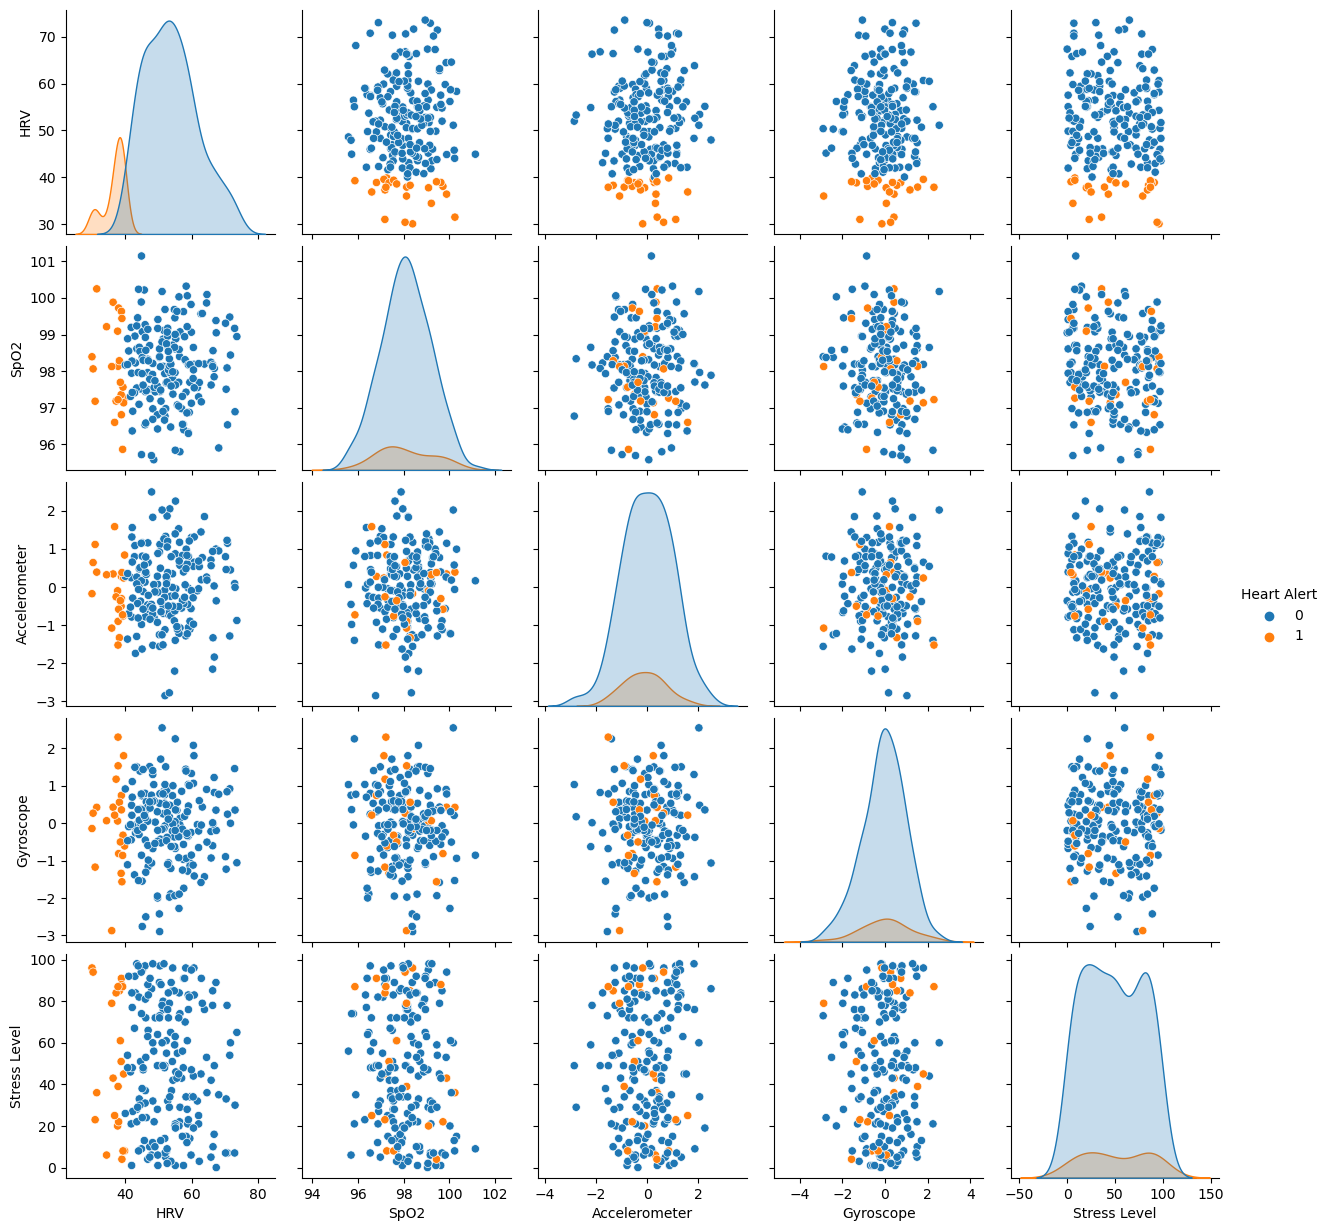

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.pairplot(data, hue='Heart Alert') 
plt.show()


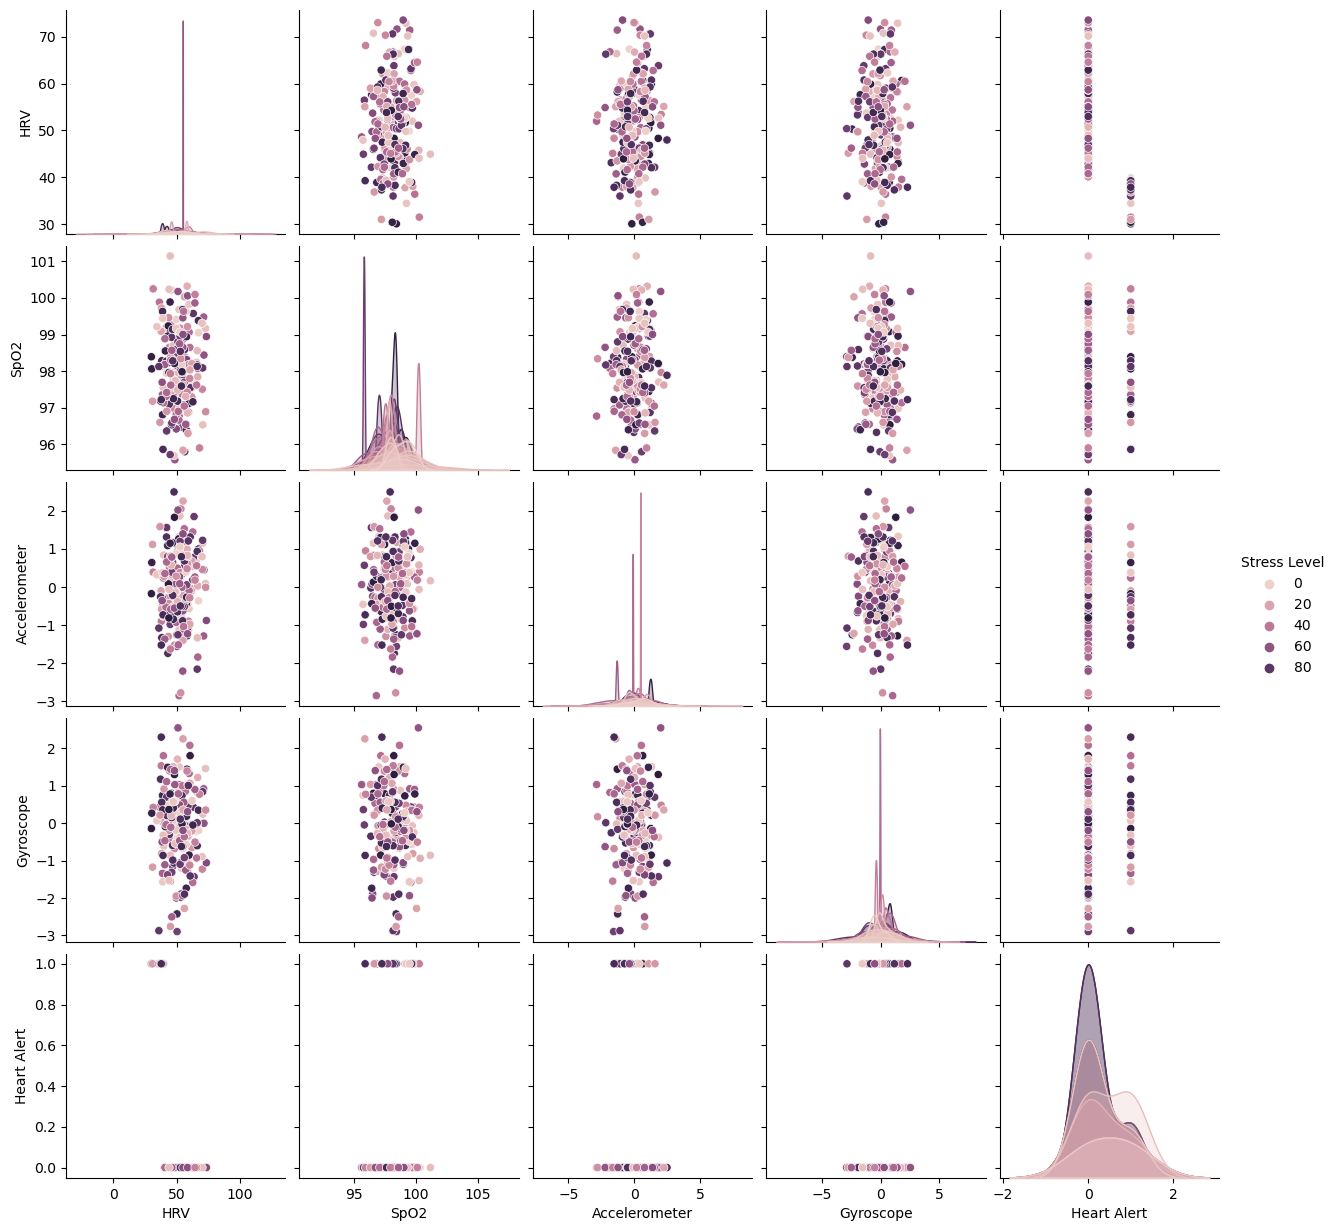

In [11]:
sns.pairplot(data, hue='Stress Level') 
plt.show()


In [12]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
HRV,200.0,51.736481,9.289863,30.062644,45.064019,51.874351,58.069737,73.555803
SpO2,200.0,98.097707,1.077631,95.583548,97.400751,98.127450,98.893901,101.141967
Accelerometer,200.0,-0.004200,0.949546,-2.848543,-0.668974,-0.008081,0.661774,2.493000
Gyroscope,200.0,-0.053196,1.019766,-2.896255,-0.624683,-0.031125,0.582939,2.543668
Stress Level,200.0,48.880000,30.368186,0.000000,22.000000,48.000000,78.000000,98.000000
Heart Alert,200.0,0.115000,0.319823,0.000000,0.000000,0.000000,0.000000,1.000000


In [14]:
reg.coef_,


NameError: name 'reg' is not defined

In [1]:
import joblib

# Save the linear regression model
joblib.dump(linear_reg_model, 'linear_regression_model.pkl')

# Save the logistic regression model
joblib.dump(logistic_reg_model, 'logistic_regression_model.pkl')


NameError: name 'linear_reg_model' is not defined

In [2]:
import pandas as pd

# Load the data
data = pd.read_csv(r"C:\\Users\\Amanda.Aninagyei\\Downloads\\smartwatch_synthetic_data_with_alerts.csv")

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())


  Age Group        HRV       SpO2  Accelerometer  Gyroscope  Stress Level  \
0  Under 18  58.204822  98.279022      -1.280304   1.440117            96   
1  Under 18  55.072740  98.607897       0.872457  -0.676392             1   
2  Under 18  60.666747  98.186609       0.650201   1.800940            96   
3  Under 18  61.692956  97.553566      -0.099176  -0.040158            32   
4  Under 18  63.821590  98.194090       1.846637  -1.430775            76   

   Heart Alert  
0            0  
1            0  
2            0  
3            0  
4            0  
Age Group        0
HRV              0
SpO2             0
Accelerometer    0
Gyroscope        0
Stress Level     0
Heart Alert      0
dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variables
X = data[['HRV', 'SpO2', 'Accelerometer', 'Gyroscope']]
y_stress = data['Stress Level']
y_heart_alert = data['Heart Alert']

# Split the data into training and testing sets
X_train, X_test, y_train_stress, y_test_stress = train_test_split(X, y_stress, test_size=0.2, random_state=42)
_, _, y_train_heart, y_test_heart = train_test_split(X, y_heart_alert, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Train a linear regression model for stress level prediction
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train_stress)

# Train a logistic regression model for heart-related issue prediction
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train_heart)


LogisticRegression()

In [5]:
# Predict stress levels
y_pred_stress = linear_reg_model.predict(X_test)
stress_mse = mean_squared_error(y_test_stress, y_pred_stress)
print(f'Stress Level Prediction MSE: {stress_mse}')

# Predict heart-related issues
y_pred_heart = logistic_reg_model.predict(X_test)
heart_accuracy = accuracy_score(y_test_heart, y_pred_heart)
print(f'Heart Alert Prediction Accuracy: {heart_accuracy}')


Stress Level Prediction MSE: 958.2596114639553
Heart Alert Prediction Accuracy: 1.0


In [6]:
import joblib

# Save the linear regression model
joblib.dump(linear_reg_model, 'linear_regression_model.pkl')

# Save the logistic regression model
joblib.dump(logistic_reg_model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [7]:
import joblib

# Save the linear regression model
joblib.dump(linear_reg_model, 'linear_regression_model.pkl')




['linear_regression_model.pkl']